## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_merge_df = pd.merge(mouse_metadata,study_results, on = "Mouse ID")

# Display the data table for preview
data_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
# Checking the number of mice.
mice_count = len(data_merge_df["Mouse ID"].unique())
print(mice_count)

249


In [16]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_timepoint_df = data_merge_df[data_merge_df[["Mouse ID","Timepoint"]].duplicated()]
duplicate_timepoint_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [17]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_id_df = data_merge_df[data_merge_df["Mouse ID"].duplicated()]
duplicated_id_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [111]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_merged_df = data_merge_df.drop_duplicates( keep="first" )
cleaned_merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [29]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(cleaned_merged_df["Mouse ID"].unique())
print(clean_mice_count)

249


## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 



grouped_regimen_df = cleaned_merged_df.groupby("Drug Regimen")
drug_mean = grouped_regimen_df["Tumor Volume (mm3)"].mean()
drug_median = grouped_regimen_df["Tumor Volume (mm3)"].median()
drug_variance = grouped_regimen_df["Tumor Volume (mm3)"].var()
drug_deviation = grouped_regimen_df["Tumor Volume (mm3)"].std()
SEM = drug_deviation / (len(grouped_regimen_df["Tumor Volume (mm3)"])**.5)


# Assemble the resulting series into a single summary dataframe.
summary_stats_df = pd.DataFrame()
summary_stats_df["Mean"] = drug_mean
summary_stats_df["Median"] = drug_median
summary_stats_df["Variance"] = drug_variance
summary_stats_df["Standard Deviation"] = drug_deviation
summary_stats_df["Standard Error Mean"] = SEM
summary_stats_df


,Mean,Median,Variance,Standard Deviation,Standard Error Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,1.579486
Ceftamin,52.591172,51.776157,39.290177,6.268188,1.982175
Infubinol,52.884795,51.820584,43.128684,6.567243,2.076745
Ketapril,55.235638,53.698743,68.553577,8.279709,2.618274
Naftisol,54.331565,52.509285,66.173479,8.134708,2.572421
Placebo,54.033581,52.288934,61.168083,7.821003,2.473218
Propriva,52.368318,50.909965,42.278090,6.502160,2.056164
Ramicane,40.216745,40.673236,23.486704,4.846308,1.532537
Stelasyn,54.233149,52.431737,59.450562,7.710419,2.438249


In [90]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
stats_by_agg_df = grouped_regimen_df["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
stats_by_agg_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Timepoints'>

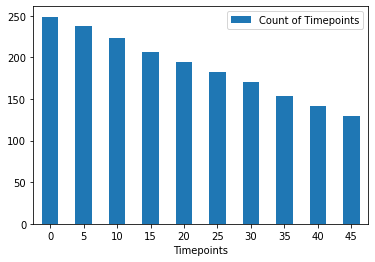

In [105]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_graph = pd.DataFrame({"Timepoints":cleaned_merged_df["Timepoint"].unique(), "Count of Timepoints":cleaned_merged_df["Timepoint"].value_counts()})
bar_graph.plot.bar(x = "Timepoints", y = "Count of Timepoints",rot = 0)



<BarContainer object of 10 artists>

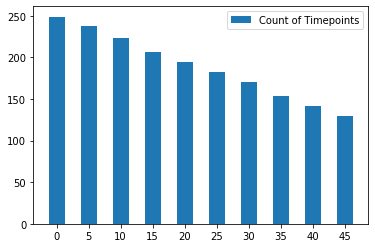

In [103]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
bar_graph_plot = plt.bar(cleaned_merged_df["Timepoint"].unique(),cleaned_merged_df["Timepoint"].value_counts(), 
                         width = 2.5, tick_label = cleaned_merged_df["Timepoint"].unique(), label = "Count of Timepoints" 
                         )
plt.legend(loc = "upper right")
bar_graph_plot



Male      958
Female    934
Name: Sex, dtype: int64

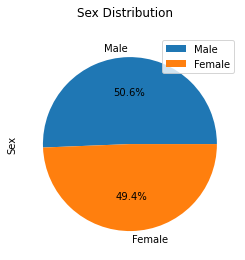

In [125]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie = cleaned_merged_df["Sex"].value_counts()
pandas_pie_chart = pie.plot.pie(y="Sex", subplots = True, title = "Sex Distribution",legend = True, autopct = "%1.1f%%")
cleaned_merged_df["Sex"].value_counts()


In [133]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pyplot_pie_char = plt.subplots(pie, autopct = "%1.1f%%")

pyplot_pie_char.show()


AttributeError: 'Figure' object has no property 'autopct'

## Quartiles, Outliers and Boxplots

In [79]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [80]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [81]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [82]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [83]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [84]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
